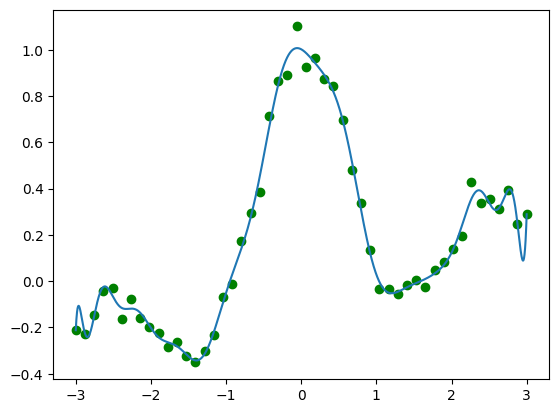

In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(0)  # set the random seed for reproducibility


def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi * x
    target = np.sin(pix) / pix + 0.1 * x
    noise = 0.05 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise


def calc_design_matrix(x):
    sample_size = len(x)
    phi = np.empty(shape=(sample_size, 31))  # design matrix
    phi[:, 0] = 1.
    phi[:, 1::2] = np.sin(x[:, None] * np.arange(1, 16)[None] / 2)
    phi[:, 2::2] = np.cos(x[:, None] * np.arange(1, 16)[None] / 2)
    return phi


# create sample
sample_size = 50
xmin, xmax = -3, 3
x, y = generate_sample(xmin=xmin, xmax=xmax, sample_size=sample_size)

# calculate design matrix
phi = calc_design_matrix(x)

# solve the least square problem
theta = np.linalg.solve(phi.T.dot(phi), phi.T.dot(y[:, None]))

# create data to visualize the prediction
X = np.linspace(start=xmin, stop=xmax, num=5000)
Phi = calc_design_matrix(X)
prediction = Phi.dot(theta)

# visualization
plt.clf()
plt.scatter(x, y, c='green', marker='o')
plt.plot(X, prediction)
plt.savefig('lecture2-1.png')

In [17]:
from sklearn.model_selection import KFold
import math

c_list = [0, 1e-7, 1e-6, 1e-5]
h_list = [50, 100, 1000, 5000]

cv = 5

best = float("inf")

class GKR:
  def __init__(self, h, c):
    self.c = c #regularization parameter
    self.h = h #Gaussian width
    


  def gaussian_kernel(self, x_i, x_j):
    return math.exp(-np.dot(x_i - x_j, x_i - x_j) / (2 * self.h**2))


  def fit(self, X, y):
    self.x = X
  #Kernel_matrix
    n = X.shape[0]

    K = np.ones((n, n))
    for i in range(n):
      for j in range(n):
        K[i][j] = self.gaussian_kernel(X[i], X[j])

    self.coef = np.linalg.solve(np.dot(K, K) + self.c * np.eye(n), np.dot(K.T, y))

    return self


  def predict(self, X):
    pred_y = []
    for x_i in X:
      k_i = np.array([self.gaussian_kernel(x_i, x_j) for x_j in self.x])
      pred_y.append(np.dot(self.coef, k_i))
    
    return np.array(pred_y)



  def evaluate(self, X, y):
    pred_y = self.predict(X)
    mse = np.average((y - pred_y) ** 2, axis=0)   #mean_squared_erro

    return mse


for c in c_list:
    for h in h_list:
        result = []
        for train_idx, test_idx in KFold(n_splits=cv).split(x):
            model = GKR(c=c, h=h)
            x_train = x[train_idx]
            y_train = y[train_idx]
            x_test = x[test_idx]
            y_test = y[test_idx]
            model.fit(x_train, y_train)
            result.append(model.evaluate(x_test, y_test))
        mse = sum(result) / cv
        print(f"c = {c},h = {h}, mse = {mse:.2f}")
        if best > mse:
            best_c = c
            best_h = h
            best = mse

c = 0,h = 50, mse = 0.38
c = 0,h = 100, mse = 0.35
c = 0,h = 1000, mse = 0.22
c = 0,h = 5000, mse = 0.22
c = 1e-07,h = 50, mse = 0.22
c = 1e-07,h = 100, mse = 0.22
c = 1e-07,h = 1000, mse = 0.22
c = 1e-07,h = 5000, mse = 0.23
c = 1e-06,h = 50, mse = 0.22
c = 1e-06,h = 100, mse = 0.22
c = 1e-06,h = 1000, mse = 0.23
c = 1e-06,h = 5000, mse = 0.23
c = 1e-05,h = 50, mse = 0.22
c = 1e-05,h = 100, mse = 0.22
c = 1e-05,h = 1000, mse = 0.23
c = 1e-05,h = 5000, mse = 0.23


In [19]:
print(f"best regularization parameter : {best_c}, best Gausisian width = {best_h}, best_mse = {mse:.2f}")

best regularization parameter : 1e-05, best Gausisian width = 100, best_mse = 0.23
